<a href="https://www.kaggle.com/code/shandeep777/economic-analysis?scriptVersionId=217266532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Economical Data Analysis With Fred & Pandas

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('fivethirtyeight')
color = sns.color_palette()

from fredapi import Fred

In [3]:
fred_key = 'e4ea6e58288c219321b504d88b48092a'
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("Fred API")

### 1. Create The FRED Object

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
fred

### 2. Search for economic data

In [6]:
sp = fred.search('S&P')

In [7]:
sp.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2025-01-12,2025-01-12,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-12-31 08:12:02-06:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2025-01-12,2025-01-12,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-12-31 08:12:02-06:00,78,"For more information regarding the index, plea..."
SP500,SP500,2025-01-12,2025-01-12,S&P 500,2015-01-12,2025-01-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-01-10 19:12:04-06:00,83,The observations for the S&P 500 represent the...
SPCS20RSA,SPCS20RSA,2025-01-12,2025-01-12,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-12-31 08:11:02-06:00,67,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2025-01-12,2025-01-12,S&P CoreLogic Case-Shiller 20-City Composite H...,2000-01-01,2024-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-12-31 08:11:45-06:00,33,"For more information regarding the index, plea..."


In [8]:
sp.shape

(1000, 15)

### 3. Pull Raw Data & Plot

In [9]:
sp500 = fred.get_series(series_id = 'SP500')

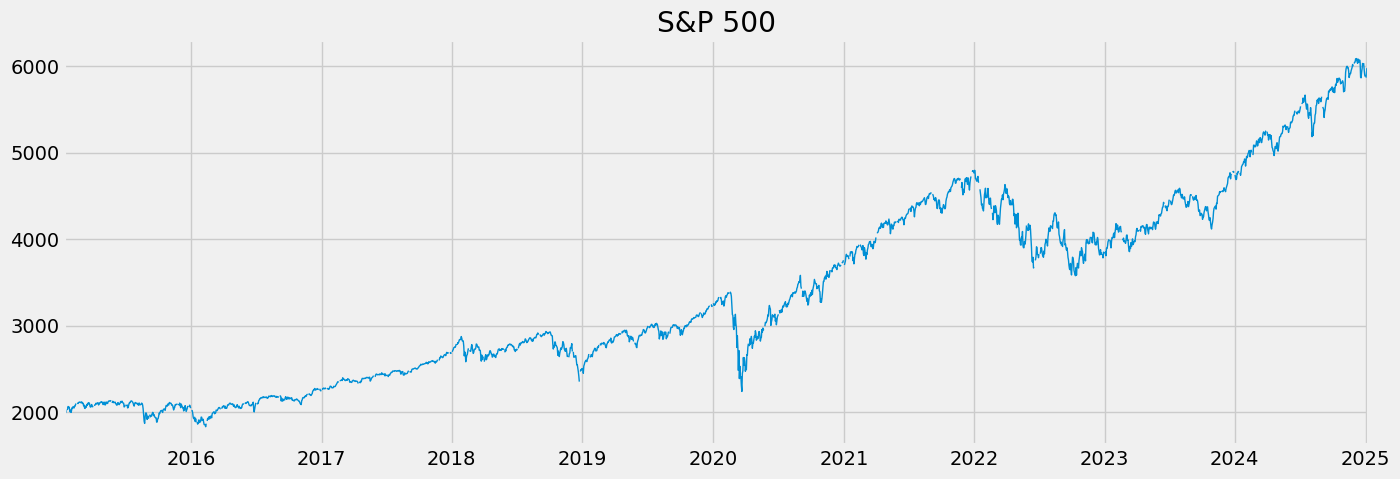

In [10]:
sp500.plot(figsize=(15,5), title='S&P 500', lw=1)
plt.show()

### 4. Pull and Join Multiple Data Series

In [11]:
ump = fred.search('unemployment')

In [12]:
ump.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-01-10 07:49:09-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-01-12,2025-01-12,Unemployment Level,1948-01-01,2024-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-01-10 07:49:04-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-01-12,2025-01-12,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-01-12,2025-01-12,Continued Claims (Insured Unemployment),1967-01-07,2024-12-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-01-08 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."


In [13]:
unrate = fred.get_series('UNRATE')

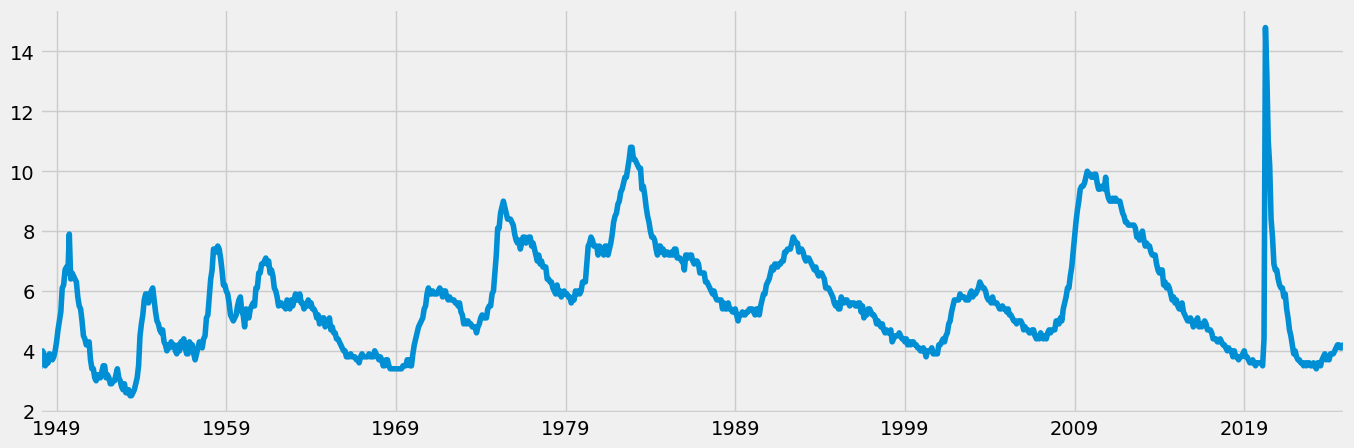

In [14]:
unrate.plot(figsize=(15,5))
plt.show()

In [15]:
ump_df = fred.search('unemployment rate state' , filter=('frequency','Monthly'))

In [16]:
ump_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-01-10 07:49:09-06:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-01-12,2025-01-12,Unemployment Rate - Black or African American,1972-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-01-12,2025-01-12,Unemployment Level,1948-01-01,2024-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-01-10 07:49:04-06:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-01-12,2025-01-12,Unemployment Level,1948-01-01,2024-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-01-10 07:49:23-06:00,27,The series comes from the 'Current Population ...


In [17]:
ump_sa = ump_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
ump_sa.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-01-12,2025-01-12,Unemployment Rate - Black or African American,1972-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-01-12,2025-01-12,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:07-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-01-12,2025-01-12,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2025-01-12,2025-01-12,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None


In [18]:
ump_sa =ump_sa.loc[ump_sa['title'].str.contains('Unemployment Rate')]

In [19]:
ump_sa.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-12,2025-01-12,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-01-12,2025-01-12,Unemployment Rate - Black or African American,1972-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2025-01-12,2025-01-12,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2025-01-12,2025-01-12,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-01-12,2025-01-12,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...


In [20]:
results_df = []

for myid in ump_sa.index:
    result = fred.get_series(myid)
    result = result.to_frame(name=myid)
    results_df.append(result)

In [21]:
ump_res = pd.concat(results_df, axis=1)

<Axes: >

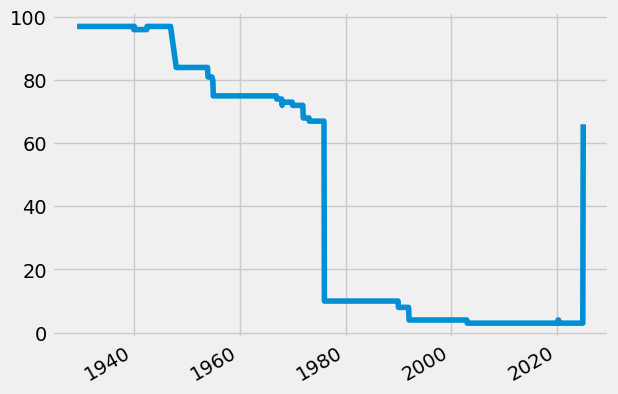

In [22]:
ump_res.isna().sum(axis=1).plot()

In [23]:
px.line(ump_res)

### 5. Pull 2020 Data Unemployment Rate Per State

In [24]:
ump_res.head()

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,...,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
